친구들과 디저트 카페 투어를 할 계획이다. 
[Fig. 1]과 같이 한 변의 길이가 N인 정사각형 모양을 가진 지역에 디저트 카페가 모여 있다.
 



원 안의 숫자는 해당 디저트 카페에서 팔고 있는 디저트의 종류를 의미하고
카페들 사이에는 대각선 방향으로 움직일 수 있는 길들이 있다.

디저트 카페 투어는 어느 한 카페에서 출발하여
[Fig. 2]와 같이 대각선 방향으로 움직이고 사각형 모양을 그리며 출발한 카페로 돌아와야 한다.
 
 

디저트 카페 투어를 하는 도중 해당 지역을 벗어나면 안 된다.
또한, 친구들은 같은 종류의 디저트를 다시 먹는 것을 싫어한다.
즉, [Fig. 3]과 같이 카페 투어 중에 같은 숫자의 디저트를 팔고 있는 카페가 있으면 안 된다.
 
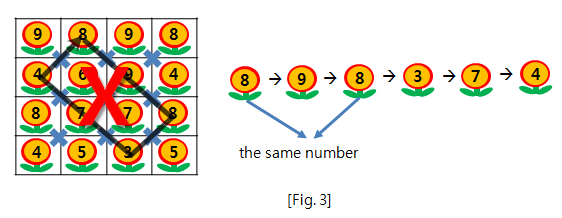


[Fig. 4]와 같이 하나의 카페에서 디저트를 먹는 것도 안 된다.

 


[Fig. 5]와 같이 왔던 길을 다시 돌아가는 것도 안 된다.
 

 

친구들과 디저트를 되도록 많이 먹으려고 한다.

디저트 가게가 모여있는 지역의 한 변의 길이 N과 디저트 카페의 디저트 종류가 입력으로 주어질 때,
임의의 한 카페에서 출발하여 대각선 방향으로 움직이고
서로 다른 디저트를 먹으면서 사각형 모양을 그리며 다시 출발점으로 돌아오는 경우,
디저트를 가장 많이 먹을 수 있는 경로를 찾고, 그 때의 디저트 수를 정답으로 출력하는 프로그램을 작성하라.

만약, 디저트를 먹을 수 없는 경우 -1을 출력한다.


[예시]

한 변의 길이 N이 4인 지역에 디저트 카페가 [Fig. 6]과 같이 있다고 생각하자.
 



디저트 카페 투어가 가능한 경우는 [Fig. 7]과 같이 5가지로 나눌 수 있다.
(출발한 곳과 도는 방향은 다를 수 있지만, 디저트 카페 투어의 경로가 그리는 사각형 모양은 5가지 중 하나이다.)

 

[Fig. 7]
 
이 중에 디저트를 가장 많이 먹을 수 있는 경우는 ⑤인 경우로 디저트의 종류는 6개이다.
따라서, 정답은 6이 된다.


[제약사항]

1. 시간제한 : 최대 50개 테스트 케이스를 모두 통과하는 데 C/C++/Java 모두 3초
2. 디저트 카페가 모여있는 지역의 한 변의 길이 N은 4 이상 20 이하의 정수이다. (4 ≤ N ≤ 20)
3. 디저트 종류를 나타나는 수는 1 이상 100 이하의 정수이다.


[입력]

입력의 맨 첫 줄에는 총 테스트 케이스의 개수 T가 주어지고, 그 다음 줄부터 T개의 테스트 케이스가 주어진다.
각 테스트 케이스의 첫 번째 줄에는 디저트 카페가 모여있는 지역의 한 변의 길이 N이 주어진다.
그 다음 N 줄에는 N * N 크기의 디저트 카페에서 팔고 있는 디저트 종류에 대한 정보가 주어진다.


[출력]

테스트 케이스 개수만큼 T개의 줄에 각각의 테스트 케이스에 대한 답을 출력한다.
각 줄은 "#t"로 시작하고 공백을 하나 둔 다음 정답을 출력한다. (t는 1부터 시작하는 테스트 케이스의 번호이다)
출력해야 할 정답은 가능한 경우 중 디저트를 가장 많이 먹을 때의 디저트 수 이다.
만약, 디저트를 먹을 수 없는 경우 정답은 -1이다.

## Ver.0: Pass

In [69]:
import sys
import time

def path_find(N, i,j, a, b, maps):
    visit = [False for _ in range(N*N+1)]
    # right up
    for ru in range(1,a+1):
        curr_cookie = maps[i-ru][j+ru]
        if visit[curr_cookie]:
            return False
        visit[curr_cookie] = True
        
    # right down
    i,j = i-a, j+a
    for rd in range(1,b+1):
        curr_cookie = maps[i+rd][j+rd]
        if visit[curr_cookie]:
            return False
        visit[curr_cookie] = True
        
    # left down
    i,j = i+b, j+b
    for ld in range(1,a+1):
        curr_cookie = maps[i+ld][j-ld]
        if visit[curr_cookie]:
            return False
        visit[curr_cookie] = True
    # left up
    i,j = i+a, j-a
    for lu in range(1,b+1):
        curr_cookie = maps[i-lu][j-lu]
        if visit[curr_cookie]:
            return False
        visit[curr_cookie] = True
    return True

def search(maps, start_point, N, max_length):
    i,j = start_point
    for a in range(1,N):   # redundant search 없앨 수 있음
        for b in range(1,N): # redundant serach 없앨 수 있음
            up_bound = (i-a) >= 0
            right_bound = (j+a+b) < N
            low_bound = (i+b) < N
            length = 2 * (a + b)
            if up_bound and right_bound and low_bound and length > max_length:
                if path_find(N,i,j,a,b,maps):
                    max_length = length
    return max_length
            
def solution(N, maps):
    max_length = -1
    for i in range(N):
        for j in range(N):
            start_point = (i,j)
            length = search(maps, start_point, N, max_length)
            if length > max_length:
                max_length = length
    return max_length

start_time = time.time()
sys.stdin = open("2105_input.txt", "r")

T = int(sys.stdin.readline().strip("\n"))

for test_case in range(1, T + 1):
    N = int(sys.stdin.readline().strip("\n").split(" ")[0])
    maps = [[0]*N for _ in range(N)]
    for i in range(N):
        ith_row = sys.stdin.readline().strip("\n").split(" ")
        for j in range(N):
            maps[i][j] = int(ith_row[j])
    s = solution(N, maps)
    print(f"#{test_case} {s}")
end_time = time.time()
print(f"Elapsed time: {end_time-start_time}")

#1 6
#2 -1
#3 4
#4 4
#5 8
#6 6
#7 14
#8 12
#9 18
#10 30
Elapsed time: 0.06784367561340332
